# Exploratory Data Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from eda import *


In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

## Understanding the dataset

In [4]:
# create a FileHandler object
file_handler = FileHandler()

In [5]:
# reading the store csv file
store_df = file_handler.read_csv("../data/store.csv")
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [6]:
# reading the sales training csv file
train_df = file_handler.read_csv("../data/train.csv")
train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


## General Statistics

In [7]:
descriptive_stats(store_df, size=True)

(1115, 10)

In [8]:
descriptive_stats(store_df, info=True)

<bound method DataFrame.info of       Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
...     ...       ...        ...                  ...   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3      

In [9]:
descriptive_stats(store_df, describe=True)

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


### Train Dataset

In [10]:
descriptive_stats(train_df, size=True)

(1017209, 9)

In [11]:
descriptive_stats(train_df, info=True)

<bound method DataFrame.info of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
0                  0              1  
1                  0       

In [12]:
descriptive_stats(train_df, describe=True)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


## Handling missing values

### Store dataset

In [13]:
percent_missing_values(store_df)

The dataset contains 21.01 % missing values.


In [14]:
missing_df = missing_values_table(store_df)

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


In [15]:
missing_df

,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.79,float64
Promo2SinceYear,544,48.79,float64
PromoInterval,544,48.79,object
CompetitionOpenSinceMonth,354,31.75,float64
CompetitionOpenSinceYear,354,31.75,float64
CompetitionDistance,3,0.27,float64


 It shows that the first 3 columns and the next 2 columns have the same number of missing values. 

In [16]:
# number of rows with missing values for the whole dataset
count_missing_rows(store_df)

750 rows(67.26%) contain atleast one missing value.


In [17]:
# number of rows with missing values for Promo2SinceWeek, Promo2SinceYear, and PromoInterval
count_missing_rows(store_df[['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']])

544 rows(48.79%) contain atleast one missing value.


In [18]:
# number of rows with missing values for group 2 (CompetitionOpenSinceMonth, and CompetitionOpenSinceYear)
count_missing_rows(store_df[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']])

354 rows(31.75%) contain atleast one missing value.


Each columuns in these groups have missing values in the same rows as their groupmates. These means the missing values in these groups appear at the same time as a cluster. Therefore, the values of the columns in each group share a common information.

In [19]:
# dataframe containing the missing rows for columns in group 1
group1_df = store_df[store_df['Promo2SinceWeek'].isna()]
group1_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
22,23,d,a,4060.0,8.0,2005.0,0,NaN,NaN,NaN


We can see that the Promo2 column is 0 for the first 10 rows. From intution we can infer that if there is no promotion the values for the columns in Promo2SinceWeek, Promo2SinceYear, and PromoInterval should be null.

Therefore, we can impute the missing values in the columns Promo2SinceWeek and Promo2SinceYear with 0 to convey the meaning of absence since year and week can't be 0. But as for PromoInterval further investigation is needed since its data type is object.

In [20]:
# check the exact data type of the object
pd.api.types.infer_dtype(store_df['PromoInterval'])

'string'

In [21]:
# all the unique values 
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

For the column PromoInterval, we will impute it with '0,0,0,0' as the other values follow list-type format containing four months. So inorder to impute these columns we should first investigate if the values we will insert exist in each column as this will oppose our intention.

In [22]:
store_df[store_df['Promo2SinceWeek'] == 0].shape

(0, 10)

In [23]:
store_df[store_df['Promo2SinceYear'] == 0].shape

(0, 10)

In [24]:
store_df[store_df['PromoInterval'] == '0,0,0,0'].shape

(0, 10)

Since the values don't appear in these columns, let's fill the missing values by '0'.

In [25]:
fix_missing_value(store_df, ['Promo2SinceWeek', 'Promo2SinceYear'], 0)

544 missing values in the column Promo2SinceWeek have been replaced by 0.
544 missing values in the column Promo2SinceYear have been replaced by 0.


In [26]:
fix_missing_value(store_df, ['PromoInterval'], '0,0,0,0')

544 missing values in the column PromoInterval have been replaced by 0,0,0,0.


In [27]:
# dataframe containing the missing rows for columns in the second group
group2_df = store_df[store_df['CompetitionOpenSinceMonth'].isna()]
group2_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
25,26,d,a,2300.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
28,29,d,c,2170.0,NaN,NaN,0,0.0,0.0,"0,0,0,0"
31,32,a,a,2910.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
39,40,a,a,180.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
40,41,d,c,1180.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [28]:
# all unique values for each column in the dataframe
unique_values_df(group2_df)

,Column,Unique values
0,Store,"[12, 853, 767, 766, 764, 762, 757, 756, 742, 7..."
1,StoreType,"[a, d, c, b]"
2,Assortment,"[c, a, b]"
3,CompetitionDistance,"[250.0, 2410.0, 50.0, 210.0, 840.0, 220.0, 150..."
4,CompetitionOpenSinceMonth,[]
5,CompetitionOpenSinceYear,[]
6,Promo2,"[1, 0]"
7,Promo2SinceWeek,"[0.0, 40.0, 14.0, 45.0, 31.0, 22.0, 5.0, 1.0, ..."
8,Promo2SinceYear,"[0.0, 2013.0, 2011.0, 2009.0, 2012.0, 2014.0, ..."
9,PromoInterval,"[0,0,0,0, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Ma..."


Since there is no pattern between each columns the conclusion would be that CompetitionOpenSinceMonth and CompetitionOpenSinceYear are null because there was already a competition when the store was opened. So let's create another column called CompetitionBeforeStoreOpened which holds values of 0 and 1, 0 indicating the absence of competition at the time the store was opened and 1 indicating the presence of competition at the time the store was opened.

In [29]:
# deriving new column
store_df['CompetitionBeforeStoreOpened'] = store_df['CompetitionOpenSinceYear'].apply(lambda x: 1 if np.isnan(x) else 0)
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,"0,0,0,0",0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,"0,0,0,0",0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,"0,0,0,0",0
...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,"0,0,0,0",0
1112,1113,a,c,9260.0,NaN,NaN,0,0.0,0.0,"0,0,0,0",1
1113,1114,a,c,870.0,NaN,NaN,0,0.0,0.0,"0,0,0,0",1


Impututing the missing values in the column CompetitionOpenSinceYear and CompetitionOpenSinceMonth with its minimun value and 1 respectively. 

In [30]:
min_year = store_df['CompetitionOpenSinceYear'].min()
min_year

1900.0

In [31]:
# impute the column CompetitionOpenSinceYear with 1900 and the column CompetitionOpenSinceMonth with 1
fix_missing_value(store_df, ['CompetitionOpenSinceYear'], min_year)
fix_missing_value(store_df, ['CompetitionOpenSinceMonth'], 1)

354 missing values in the column CompetitionOpenSinceYear have been replaced by 1900.0.
354 missing values in the column CompetitionOpenSinceMonth have been replaced by 1.


Handling missing values of column CompetitionDistance

In [32]:
temp_df = store_df[store_df['CompetitionDistance'].isna()]
temp_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened
290,291,d,a,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
621,622,a,c,NaN,1.0,1900.0,0,0.0,0.0,"0,0,0,0",1
878,879,d,a,NaN,1.0,1900.0,1,5.0,2013.0,"Feb,May,Aug,Nov",1


In [33]:
unique_values_df(temp_df)

,Column,Unique values
0,Store,"[291, 622, 879]"
1,StoreType,"[d, a]"
2,Assortment,"[a, c]"
3,CompetitionDistance,[]
4,CompetitionOpenSinceMonth,[1.0]
5,CompetitionOpenSinceYear,[1900.0]
6,Promo2,"[0, 1]"
7,Promo2SinceWeek,"[0.0, 5.0]"
8,Promo2SinceYear,"[0.0, 2013.0]"
9,PromoInterval,"[0,0,0,0, Feb,May,Aug,Nov]"


All rows with missing values in the column CompetitionDistance has a value of 1 in the column CompetitionBeforeStoreOpened. This is because the competitions for these stores are very far away and have almost no impact on these stores that they weren't measured when collecting the data. For this reason, I will impute thess values with the maximum competition distance.

In [34]:
max_dist = store_df['CompetitionDistance'].max()
max_dist


75860.0

In [35]:
fix_missing_value(store_df, ['CompetitionDistance'], max_dist)

3 missing values in the column CompetitionDistance have been replaced by 75860.0.


In [36]:
# final check for missing values
percent_missing_values(store_df)

The dataset contains 0.0 % missing values.


### Train dataset

In [37]:
percent_missing_values(train_df)

The dataset contains 0.0 % missing values.


## Handling data types

In [38]:
store_df.dtypes

Store                             int64
StoreType                        object
Assortment                       object
CompetitionDistance             float64
CompetitionOpenSinceMonth       float64
CompetitionOpenSinceYear        float64
Promo2                            int64
Promo2SinceWeek                 float64
Promo2SinceYear                 float64
PromoInterval                    object
CompetitionBeforeStoreOpened      int64
dtype: object

In [39]:
# get the columns with object data type
string_columns = store_df.select_dtypes(include='object').columns.tolist()
string_columns

['StoreType', 'Assortment', 'PromoInterval']

In [40]:
convert_to_string(store_df, string_columns)

In [41]:
#Converting the columns to int as they cannot be floats.
convert_to_int(store_df, ['CompetitionOpenSinceMonth',  'CompetitionOpenSinceYear',
        'Promo2SinceWeek', 'Promo2SinceYear'])

In [42]:
store_df.dtypes

Store                             int64
StoreType                        string
Assortment                       string
CompetitionDistance             float64
CompetitionOpenSinceMonth         int64
CompetitionOpenSinceYear          int64
Promo2                            int64
Promo2SinceWeek                   int64
Promo2SinceYear                   int64
PromoInterval                    string
CompetitionBeforeStoreOpened      int64
dtype: object

In [43]:
#Checking if there is mixed data type in the train dataset.
show_cols_mixed_dtypes(train_df)

         Column      Data type
0  StateHoliday  mixed-integer


In [44]:
train_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [45]:
train_df['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object')

In [46]:
convert_to_string(train_df, ['StateHoliday'])

In [47]:
train_df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     string
SchoolHoliday     int64
dtype: object

In [48]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [49]:
convert_to_datetime(train_df, ['Date'])

In [50]:
train_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             string
SchoolHoliday             int64
dtype: object

## Handling duplicates

In [51]:
# search for duplicate rows and drop them
drop_duplicates(store_df)

No duplicate rows were found.


In [52]:
# search for duplicate rows and drop them
drop_duplicates(train_df)

No duplicate rows were found.


## Handling Date column

In [53]:
train_df['Year'] = train_df['Date'].apply(lambda x: x.year)
train_df['Month'] = train_df['Date'].apply(lambda x: x.month)
train_df['DayOfMonth'] = train_df['Date'].apply(lambda x: x.day)
train_df['WeekOfYear'] = train_df['Date'].apply(lambda x: x.weekofyear)
train_df['weekday'] = train_df['DayOfWeek'].apply(lambda x: 0 if (x in [6, 7]) else 1)

In [54]:
train_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayOfMonth,WeekOfYear,weekday
651904,415,7,2013-11-24,0,0,0,0,0,0,2013,11,24,47,0
22696,397,6,2015-07-11,4307,573,1,0,0,0,2015,7,11,28,0
322475,90,2,2014-09-30,11950,1358,1,1,0,0,2014,9,30,40,1
296218,1114,3,2014-10-29,16579,2649,1,0,0,0,2014,10,29,44,1
285535,642,7,2014-11-09,0,0,0,0,0,0,2014,11,9,45,0
809940,121,5,2013-07-05,5319,657,1,1,0,0,2013,7,5,27,1
999307,1053,4,2013-01-17,6519,876,1,0,0,0,2013,1,17,3,1
624045,431,4,2013-12-19,13482,1343,1,1,0,0,2013,12,19,51,1
666759,775,1,2013-11-11,7221,597,1,0,0,0,2013,11,11,46,1
337888,631,7,2014-09-14,0,0,0,0,0,0,2014,9,14,37,0


In [55]:
def getMonth(month_list, index):
    months = ['0', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    month_list = month_list.split(',')
    month = month_list[index]
    return months.index(month)

In [56]:
# split the PromoInterval column into 4 columns
store_df['PromoInterval0'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 0)))
store_df['PromoInterval1'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 1)))
store_df['PromoInterval2'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 2)))
store_df['PromoInterval3'] = store_df.PromoInterval.apply((lambda x: getMonth(x, 3)))

In [57]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
561,562,b,c,1210.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0
826,827,a,c,250.0,1,2005,0,0,0,"0,0,0,0",0,0,0,0,0
902,903,d,c,7290.0,9,2014,0,0,0,"0,0,0,0",0,0,0,0,0
1103,1104,d,a,260.0,2,2012,1,14,2011,"Jan,Apr,Jul,Oct",0,1,4,7,10
814,815,a,a,590.0,1,1900,1,40,2014,"Jan,Apr,Jul,Oct",0,1,4,7,10
400,401,a,c,9200.0,10,2009,1,14,2012,"Jan,Apr,Jul,Oct",0,1,4,7,10
613,614,a,a,1160.0,12,2012,0,0,0,"0,0,0,0",0,0,0,0,0
587,588,d,c,15720.0,3,2010,0,0,0,"0,0,0,0",0,0,0,0,0
439,440,d,a,3900.0,4,2005,1,45,2009,"Feb,May,Aug,Nov",0,2,5,8,11
772,773,a,a,200.0,1,1900,0,0,0,"0,0,0,0",1,0,0,0,0


In [58]:
# save the clean dataframe to a csv file
file_handler.to_csv(train_df, '../data/eda/train.csv')
file_handler.to_csv(store_df, '../data/eda/store.csv')

In [59]:
# merging store_df and train_df
df = pd.merge(train_df, store_df, how='inner', on='Store')
df.shape

(1017209, 28)

In [60]:
# save merged dataframe
file_handler.to_csv(df, '../data/eda/merged.csv')

## Univariate Analysis

### Store type

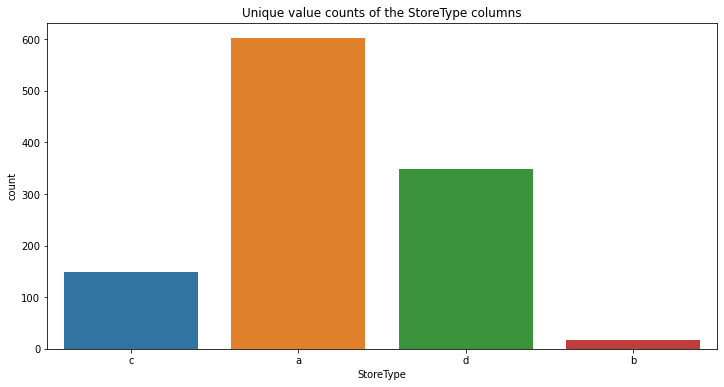

In [61]:
plot_counts(store_df, "StoreType",type="univariate")


In [62]:
# unique value counts
counts_df = store_df['StoreType'].value_counts()
counts_df

a    602
d    348
c    148
b     17
Name: StoreType, dtype: Int64

### Assortment

In [63]:
# unique value counts
counts_df = store_df['Assortment'].value_counts()
counts_df

a    593
c    513
b      9
Name: Assortment, dtype: Int64

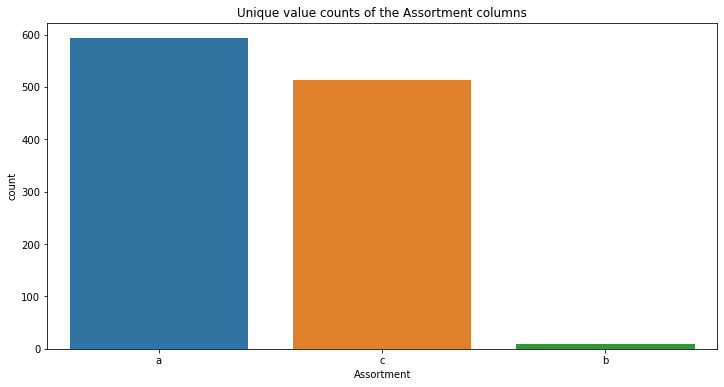

In [64]:
plot_counts(store_df, "Assortment",type="univariate")

### Competition distance

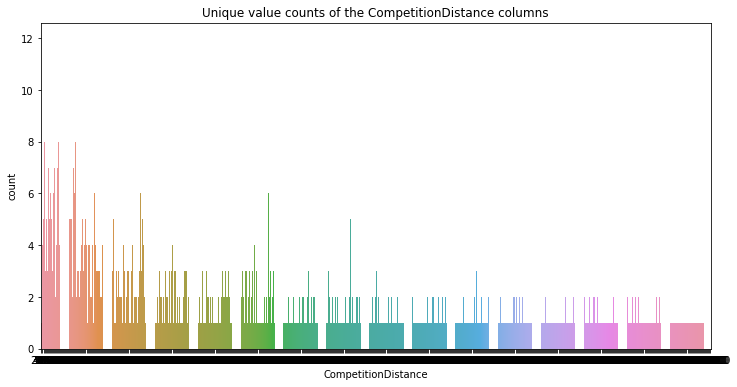

In [65]:
plot_counts(store_df, "CompetitionDistance",type="univariate")

### Promo2

In [66]:
# unique value counts
counts_df = store_df['Promo2'].value_counts()
counts_df

1    571
0    544
Name: Promo2, dtype: int64

### Competition before store opened

In [67]:
# unique value counts
counts_df = store_df['CompetitionBeforeStoreOpened'].value_counts()
counts_df

0    761
1    354
Name: CompetitionBeforeStoreOpened, dtype: int64

### Day of week

In [68]:
# unique value counts
counts_df = train_df['DayOfWeek'].value_counts()
counts_df

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

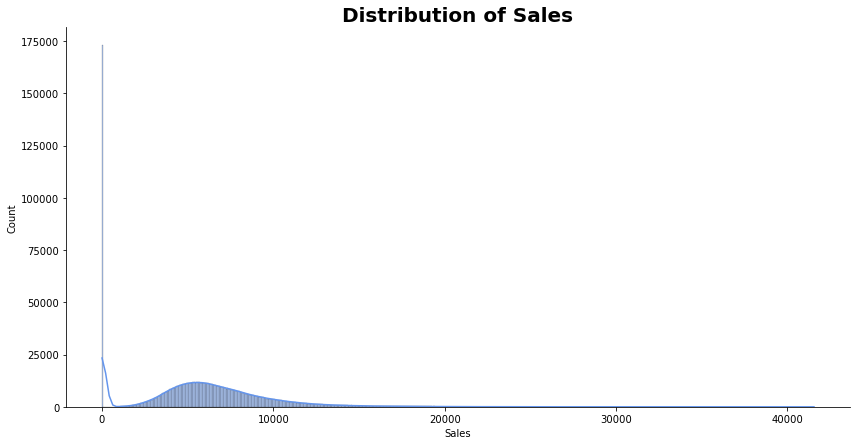

In [69]:
plot_hist(train_df, 'Sales')

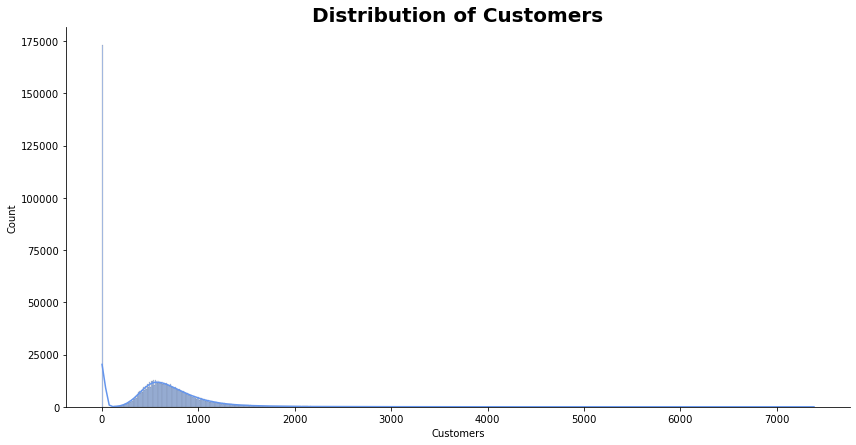

In [70]:
plot_hist(train_df, 'Customers')

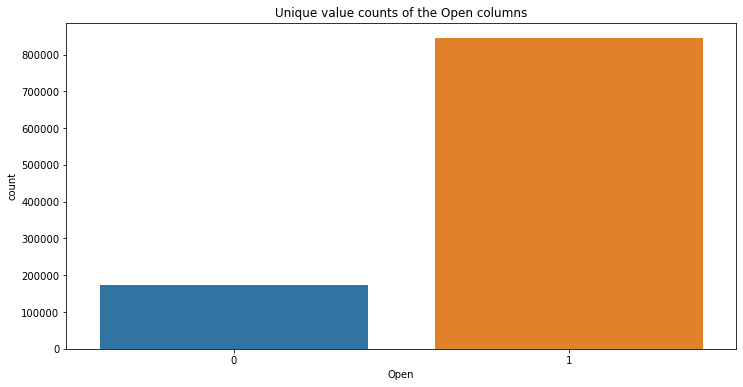

In [71]:
plot_counts(train_df, "Open",type="univariate")

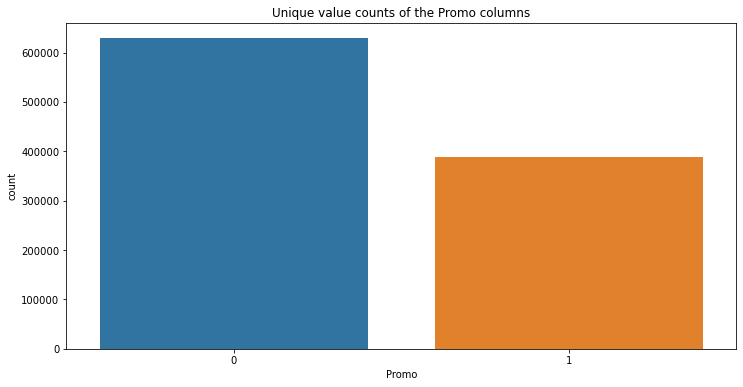

In [72]:
plot_counts(train_df, "Promo",type="univariate")

### State holiday

In [73]:
# unique value counts
counts_df = train_df['StateHoliday'].value_counts()
counts_df

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: Int64

### School holiday

In [74]:
# unique value counts
counts_df = train_df['SchoolHoliday'].value_counts()
counts_df

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

## Bivariate Analysis

### State holiday and Sales

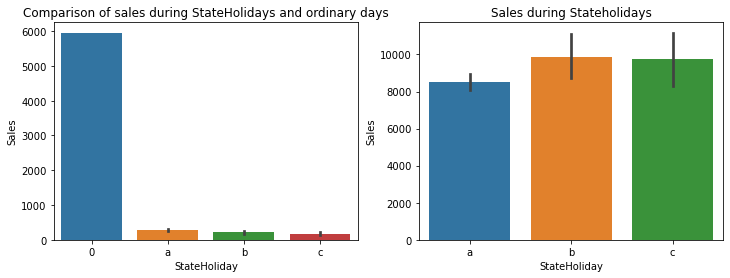

In [75]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (train_df["StateHoliday"] != "0") & (train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_df[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

### SchoolHoliday vs sales and Customers

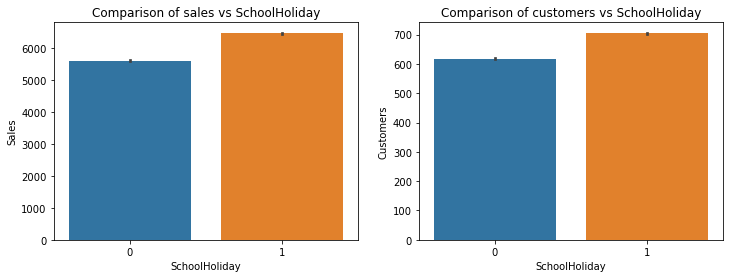

In [76]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=train_df, ax=axis1).set_title('Comparison of sales vs SchoolHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=train_df, ax=axis2).set_title('Comparison of customers vs SchoolHoliday')
plt.show()

### StoreType vs Sales and Customers

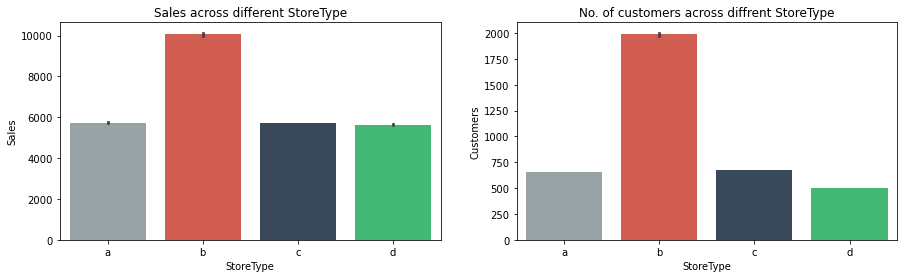

In [77]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=df, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=df, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

### Assortment vs Sales and Customers

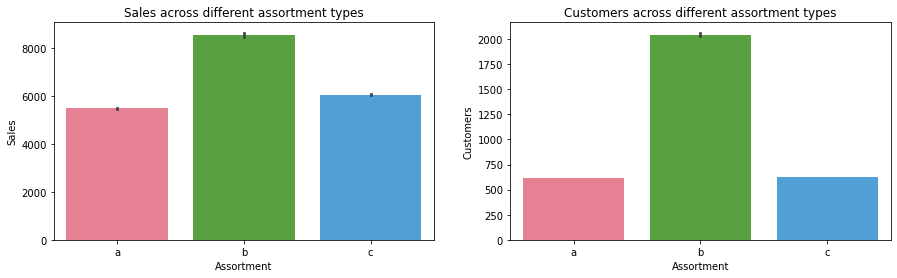

In [78]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=df, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=df, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

### DayOfWeek vs Sales and Customers

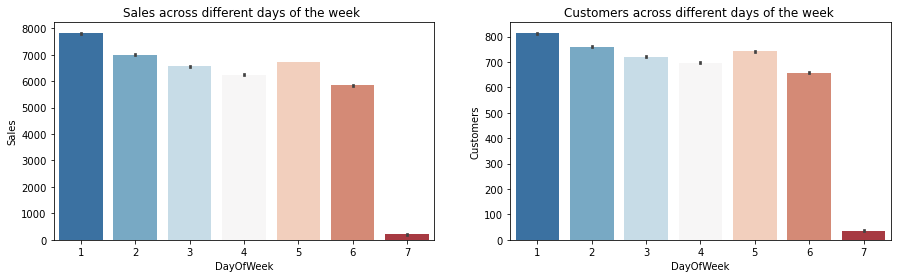

In [79]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_df, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=train_df, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

### Promo vs Sales and Customers

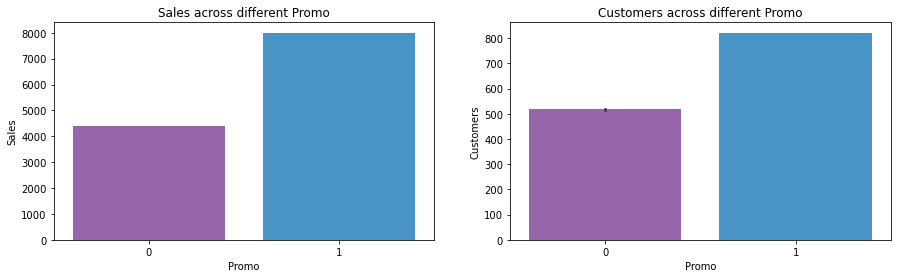

In [80]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=train_df, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=train_df, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

### Promo2 vs Sales and Customers

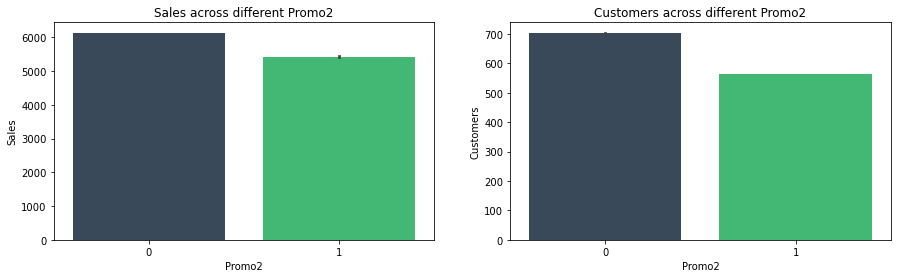

In [81]:
flatui = [ "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=df, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=df, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

### PromoInterval vs Sales and Customers

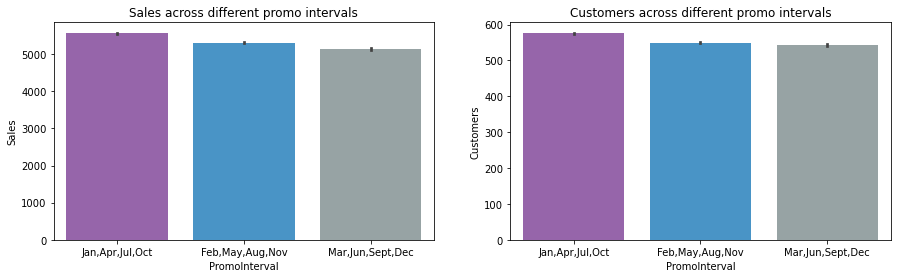

In [82]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (df["Promo2"] != 0)

sns.barplot(x='PromoInterval', y='Sales', data=df[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=df[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()


### Open and DayOfWeek

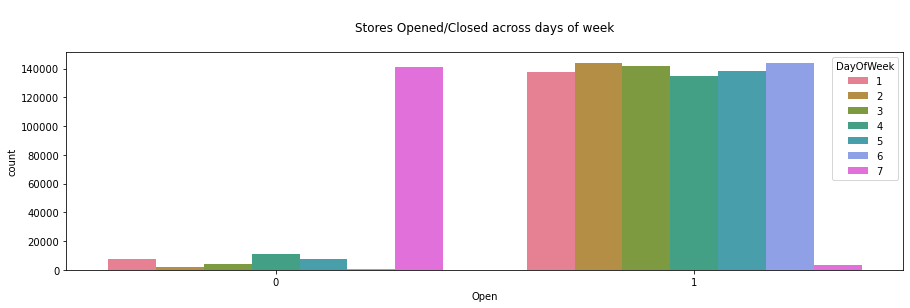

In [83]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_df,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

### Sales and Month

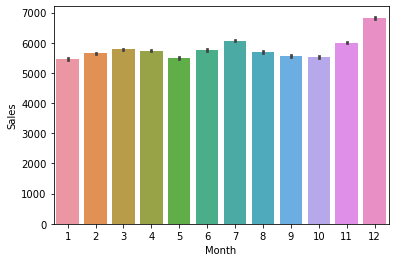

In [84]:
sns.barplot(x='Month', y='Sales', data=df)
plt.show()

### Competition distance and Sales

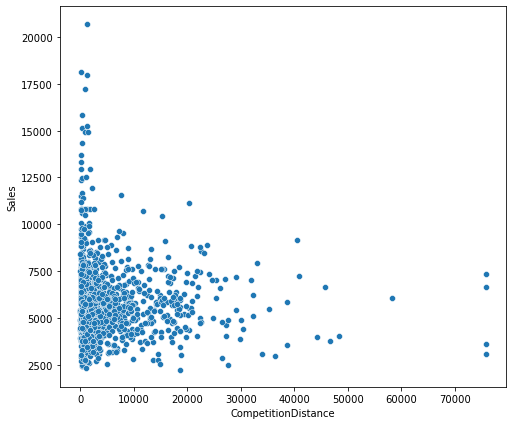

In [85]:
a = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

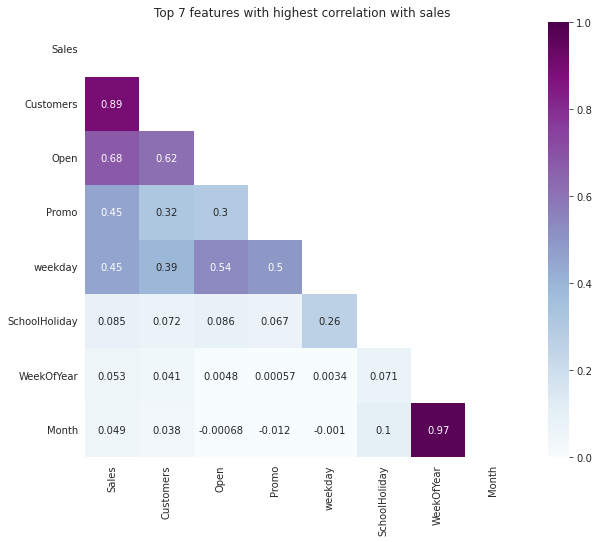

In [86]:
f_most_correlated = df.corr().nlargest(8,'Sales')['Sales'].index
f_correlation = df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

### Distribution of promotion in the training and test datasets

In [87]:
# reading test data
test_df = file_handler.read_csv("../data/test.csv")
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


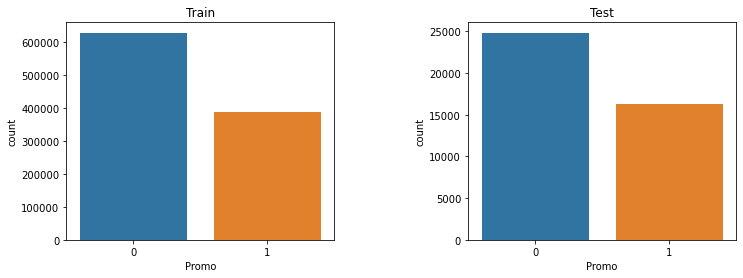

In [88]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_df, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_df, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()

The distribution of promotion is almost the same in both datasets.

### Monthly sales trend per store type

In [89]:
store_type_a = df[df.StoreType == 'a']
store_type_b = df[df.StoreType == 'b']
store_type_c = df[df.StoreType == 'c']
store_type_d = df[df.StoreType == 'd']

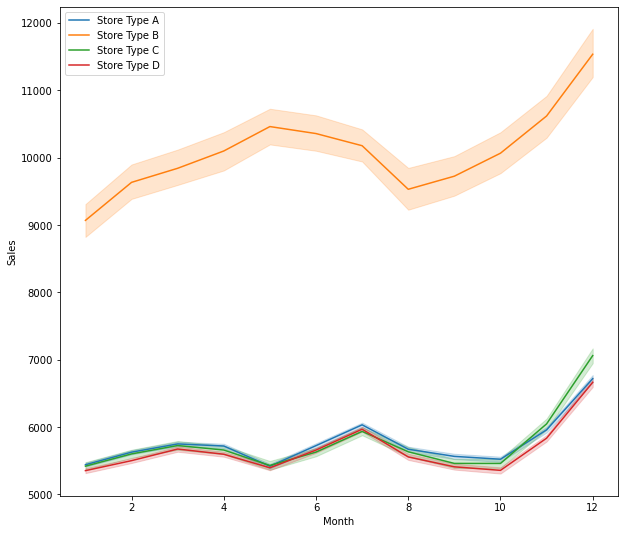

In [90]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

### Monthly sales per StoreType and Promo

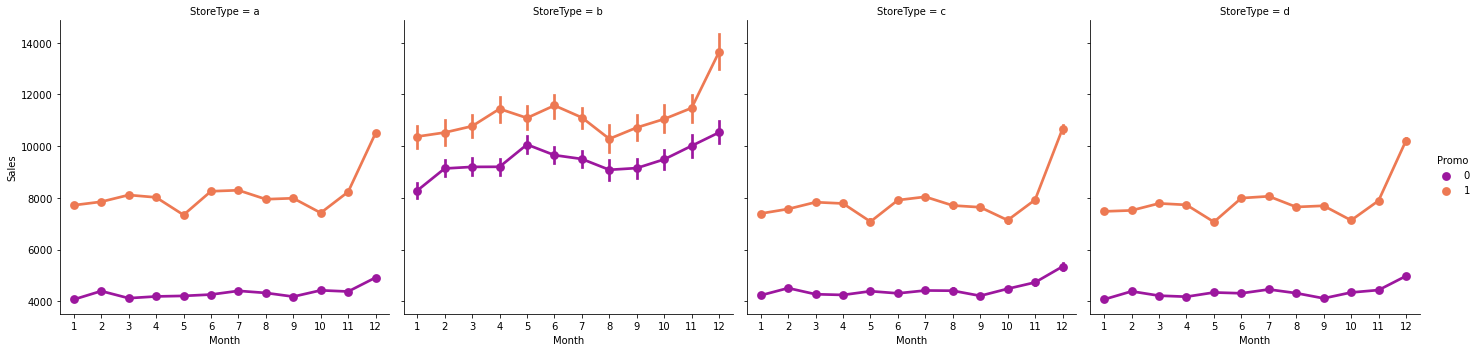

In [91]:
sns.factorplot(data = df, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly customers per StoreType and Promo

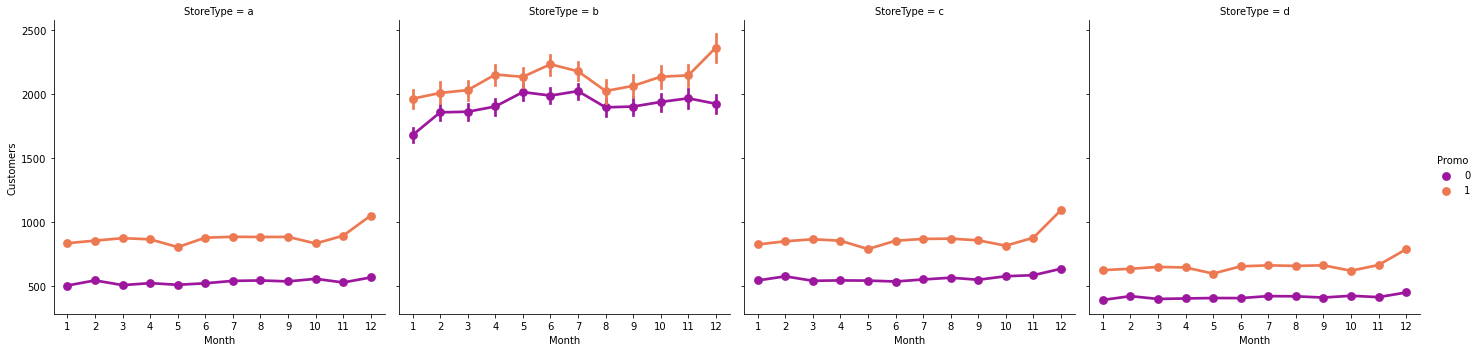

In [92]:
sns.factorplot(data = df, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               title='Promotion impact on sales per store types')
plt.show()

### Monthly sales per Assortment and Promo

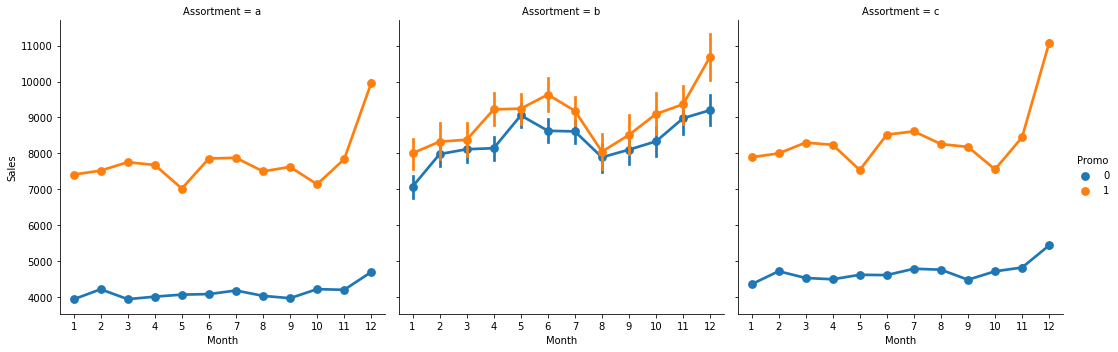

In [93]:
sns.factorplot(data = df, x = 'Month', y = 'Sales', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

### Monthly customers per Assortment and Promo

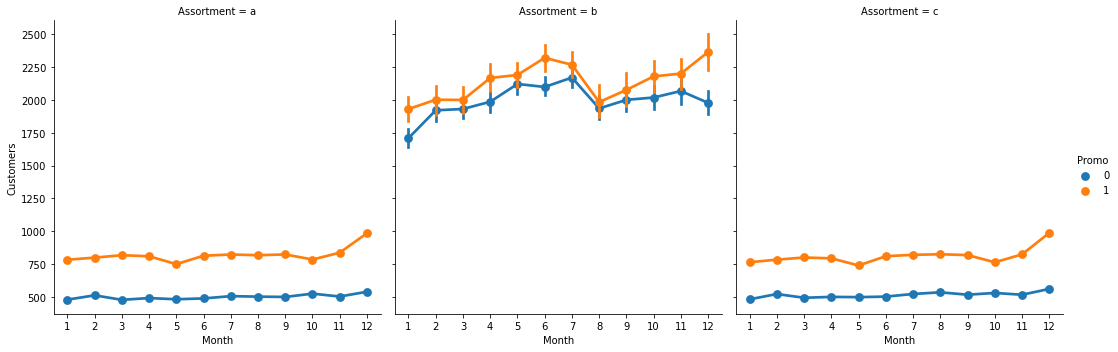

In [94]:
sns.factorplot(data = df, x = 'Month', y = 'Customers', col='Assortment', hue='Promo', col_order=['a','b','c'])
plt.show()

### Sales of stores open per DayOfWeek and StoreType

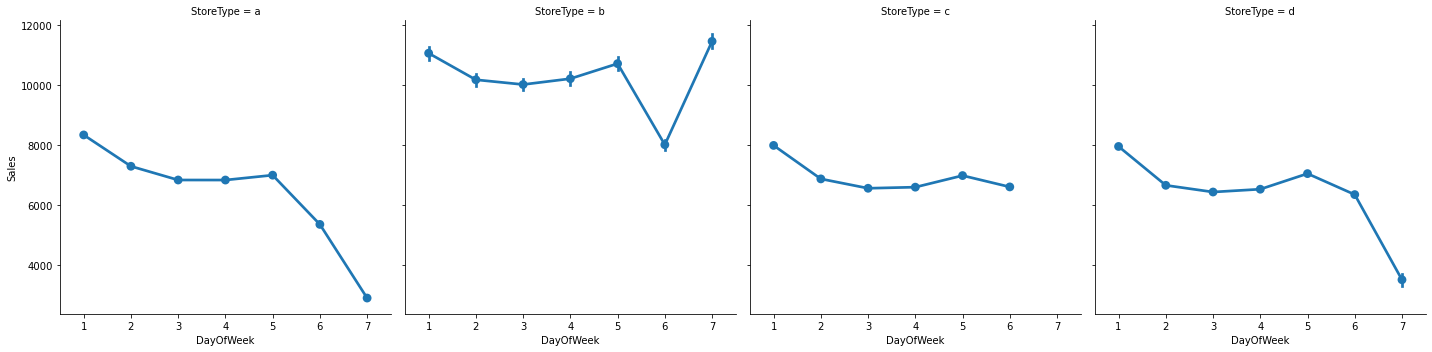

In [95]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='StoreType', col_order=['a','b','c', 'd'])
plt.show()

### Sales of stores open per DayOfWeek and Assortment

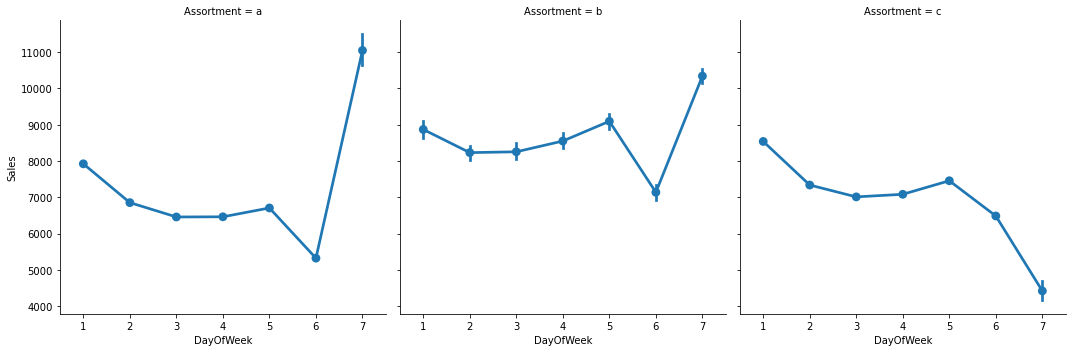

In [96]:
# stores that are open only
mask = (df["Open"] != 0)

sns.factorplot(data = df[mask], x = 'DayOfWeek', y = 'Sales', col='Assortment', col_order=['a','b','c'])
plt.show()

### Sales before, after and during Christmas

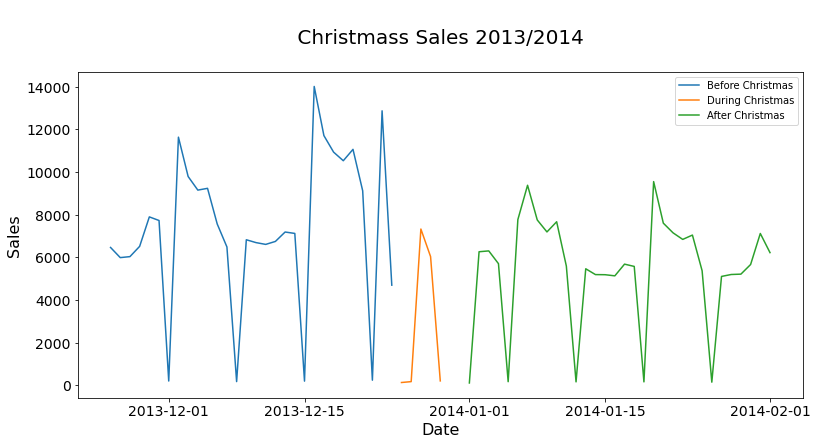

In [97]:
before_index = (train_df["Date"] >= pd.to_datetime("2013-11-25")) & (train_df["Date"] < pd.to_datetime("2013-12-25"))
before_xmass = train_df[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (train_df["Date"] >= pd.to_datetime("2013-12-25")) & (train_df["Date"] < pd.to_datetime("2013-12-30"))
during_xmass = train_df[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (train_df["Date"] >= pd.to_datetime("2014-01-01")) & (train_df["Date"] < pd.to_datetime("2014-02-02"))
after_xmass = train_df[after_index].groupby("Date").agg({"Sales": "mean"})


plt.figure(figsize=(13, 6))

sns.lineplot(x = before_xmass.index, y = before_xmass["Sales"], label='Before Christmas')
sns.lineplot(x = during_xmass.index, y = during_xmass["Sales"], label='During Christmas')
sns.lineplot(x = after_xmass.index, y = after_xmass["Sales"], label='After Christmas')

plt.title("\n Christmass Sales 2013/2014 \n", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(xlabel="Date", fontsize=16)
plt.ylabel(ylabel="Sales", fontsize=16)
plt.show()

## Results of EDA

- The most selling and crowded store type with the best assortment is b.
- Sales is highly correlated to customers.
- For all stores, promotion leads to increase in Sales and Customers. But promotions have low impact on store type b and assortment b when comparing to the other store types and assortments. Therefore, promotions should be applied more in the other store types and assortments.
- Store type b is the most opened store type on all weekdays and has its highest sales on sundays than the other days.
- Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days. The number of cusomers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.
- Sales increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more products or medicines for precaution during Christmas celebration.
- Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals. Even though not having competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.